In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

# Mostrar floats com duas casas decimas
pd.set_option('display.float_format',  lambda x: '%.3g' % x)
pd.options.display.max_colwidth = 20
pd.options.display.max_columns = 20
pd.options.display.max_rows = 6

In [3]:
# Load stock list
df_stocks = pd.read_csv("../data/2_stocks_rank.csv", parse_dates=["cutoff_date"])
df_stocks.rank_final = df_stocks.rank_final.astype(int)
df_stocks

,cutoff_date,codneg,codisi,especi,premed,totneg,codemi,year,codcvm,cia_nome,...,net_debt,ebit,roic,market_cap,enterprise_value,earnings_yield,rank_roic,rank_ey,ranks_sum,rank_final
0,2011-04-11,LREN3,BRLRENACNOR1,ON NM,6.56,3604,LREN,2011,8133,LOJAS RENNER S.A.,...,-2.72e+07,4.04e+08,0.407,8.03e+08,8.3e+08,0.487,5,7,12,1
1,2011-04-11,TOTS3,BRTOTSACNOR8,ON NM,8.73,244,TOTS,2011,19992,TOTVS S.A.,...,1.79e+08,2.12e+08,0.261,2.75e+08,9.53e+07,2.22,20,1,21,2
2,2011-04-11,BRAP4,BRBRAPACNPR2,PN N1,17.7,3861,BRAP,2011,18724,BRADESPAR S.A.,...,2.47e+09,2.45e+09,0.258,6.19e+09,3.72e+09,0.659,21,6,27,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,2022-04-11,AMAR3,BRAMARACNOR4,ON NM,2.91,3715,AMAR,2022,22055,MARISA LOJAS S.A.,...,1.2e+09,4.8e+06,0.00218,7.61e+08,-4.4e+08,-0.0109,157,139,296,155
1209,2022-04-11,RDNI3,BRRDNIACNOR9,ON NM,8.01,35,RDNI,2022,20451,RNI NEGÓCIOS IMO...,...,4.71e+08,1.98e+07,0.0179,3.51e+08,-1.21e+08,-0.164,151,145,296,156
1210,2022-04-11,COGN3,BRCOGNACNOR2,ON NM,2.69,38694,COGN,2022,17973,COGNA EDUCAÇÃO S.A.,...,5.87e+09,7.84e+07,0.00399,5.05e+09,-8.19e+08,-0.0957,156,142,298,157


In [17]:
# Slice dataframe with columns that will be used
cols = ['cutoff_date', 'codneg', 'cia_nome', 'year', 'rank_final']
df_stocks = df_stocks.loc[:, cols]
df_stocks

,cutoff_date,codneg,cia_nome,year,rank_final
0,2011-04-11,LREN3,LOJAS RENNER S.A.,2011,1
1,2011-04-11,TOTS3,TOTVS S.A.,2011,2
2,2011-04-11,BRAP4,BRADESPAR S.A.,2011,3
...,...,...,...,...,...
1208,2022-04-11,AMAR3,MARISA LOJAS S.A.,2022,155
1209,2022-04-11,RDNI3,RNI NEGÓCIOS IMO...,2022,156
1210,2022-04-11,COGN3,COGNA EDUCAÇÃO S.A.,2022,157


In [18]:
# Select the first 30 companies in the magic rank for each year
df_stocks.query('rank_final <= 30', inplace=True)
df_stocks.reset_index(drop=True, inplace=True)
df_stocks

,cutoff_date,codneg,cia_nome,year,rank_final
0,2011-04-11,LREN3,LOJAS RENNER S.A.,2011,1
1,2011-04-11,TOTS3,TOTVS S.A.,2011,2
2,2011-04-11,BRAP4,BRADESPAR S.A.,2011,3
...,...,...,...,...,...
357,2022-04-11,JALL3,Jalles Machado S.A.,2022,28
358,2022-04-11,PDTC3,PADTEC HOLDING S.A.,2022,29
359,2022-04-11,POSI3,POSITIVO TECNOLO...,2022,30


In [19]:
# Load complete B3 adjusted price data
# s3://aq-dl/HistoricalQuotations/base_adj.feather
PROCESSED_PATH = Path("/mnt/aq_disk/data/HistoricalQuotations/processed/")
path = PROCESSED_PATH / "base_adj.feather"
df_b3 = pd.read_feather(path)
df_b3

,datneg,codneg,codisi,nomres,especi,codbdi,tpmerc,dismes,datven,prazot,...,premed,preult,preofc,preofv,preexe,totneg,quatot,voltot,evento,ajuste
0,2022-02-03,5GTK11,BR5GTKCTF000,INVESTO 5GTK,CI,14,10,100,NaT,0,...,95.7,94.9,94.9,97.7,0,85,2.08e+04,2e+06,,1
1,2022-02-04,5GTK11,BR5GTKCTF000,INVESTO 5GTK,CI,14,10,100,NaT,0,...,95.8,95.8,95.4,95.8,0,50,1.11e+03,1.06e+05,,1
2,2022-02-07,5GTK11,BR5GTKCTF000,INVESTO 5GTK,CI,14,10,100,NaT,0,...,94.8,94.5,93.5,94.5,0,32,2.07e+03,1.96e+05,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10938221,2000-12-06,ZIVI4FF,BRZIVIACNPR1,ZIVI,PN *,96,20,136,NaT,0,...,0.4,0.4,0.21,0.46,0,2,7.62e+05,305,,1
10938222,2013-12-18,ZNTE6L,BRZNTEACNPB8,FERR ZANETTE,PNB,52,17,104,NaT,0,...,0.82,0.82,0,0,0,1,7.44e+05,6.1e+05,,1
10938223,2012-12-13,ZNTE7L,BRZNTEACNPC6,FERR ZANETTE,PNC*,52,17,111,NaT,0,...,0.82,0.82,0,0,0,1,4.76e+08,3.9e+05,,1


In [20]:
# Select only stocks after 2011 (first year with available accounting data) and remove
# other assets (stock options, ETFs, etc)
df_prices = df_b3.copy()
df_prices.query(
    'codbdi == 2 and datneg >= "2011.01.01"',
    inplace=True
)
df_prices.reset_index(drop=True, inplace=True)
# Remove columns that will not be used for backtesting
# Daily average stock price (premed) will be used for entering and exiting positions
cols = ['datneg', 'codneg', 'codisi', 'especi', 'premed', 'totneg', 'quatot', 'voltot']
df_prices = df_prices.loc[:, cols]
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot
0,2020-02-07,A1AP34,BRA1APBDR001,DRN,35.8,2,1.72e+05,6.14e+06
1,2020-02-10,A1AP34,BRA1APBDR001,DRN,35.6,1,1.44e+04,5.12e+05
2,2020-02-13,A1AP34,BRA1APBDR001,DRN,36.8,1,6.4e+03,2.36e+05
...,...,...,...,...,...,...,...,...
1144799,2022-06-02,Z2SC34,BRZ2SCBDR000,DRN,25.6,1,5,128
1144800,2022-06-06,Z2SC34,BRZ2SCBDR000,DRN,25.1,1,3,75.3
1144801,2022-06-09,Z2SC34,BRZ2SCBDR000,DRN,26.4,1,1,26.4


In [21]:
# Join price dataframe with ranked stocks dataframe
df_prices = df_prices.merge(right=df_stocks, how='inner')
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final
0,2013-11-11,ABEV3,BRABEVACNOR1,ON,13.1,15208,1e+07,1.31e+08,2014-04-10,AMBEV S.A.,2014,28
1,2013-11-12,ABEV3,BRABEVACNOR1,ON,12.9,28954,1.53e+07,1.98e+08,2014-04-10,AMBEV S.A.,2014,28
2,2013-11-13,ABEV3,BRABEVACNOR1,ON,12.9,13538,8.41e+06,1.08e+08,2014-04-10,AMBEV S.A.,2014,28
...,...,...,...,...,...,...,...,...,...,...,...,...
861299,2022-06-07,YDUQ3,BRYDUQACNOR3,ON NM,15.2,6663,2.14e+06,3.25e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26
861300,2022-06-08,YDUQ3,BRYDUQACNOR3,ON NM,15.1,6301,1.53e+06,2.31e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26
861301,2022-06-09,YDUQ3,BRYDUQACNOR3,ON NM,15.2,8285,1.82e+06,2.76e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26


In [22]:
# Create a list of ordered unique cutoff dates
values = list(df_prices.cutoff_date.sort_values().drop_duplicates())
# Add one extra year to the end of the list
values.append(values[-1] + pd.DateOffset(years=1))
keys = list(range(len(values)))
# Create a dictionary where the keys are the cutoff dates
cutoff_dict = dict(zip(keys, values))
cutoff_dict

{0: Timestamp('2011-04-11 00:00:00'),
 1: Timestamp('2012-04-09 00:00:00'),
 2: Timestamp('2013-04-10 00:00:00'),
 3: Timestamp('2014-04-10 00:00:00'),
 4: Timestamp('2015-04-10 00:00:00'),
 5: Timestamp('2016-04-11 00:00:00'),
 6: Timestamp('2017-04-10 00:00:00'),
 7: Timestamp('2018-04-10 00:00:00'),
 8: Timestamp('2019-04-10 00:00:00'),
 9: Timestamp('2020-04-09 00:00:00'),
 10: Timestamp('2021-04-12 00:00:00'),
 11: Timestamp('2022-04-11 00:00:00'),
 12: Timestamp('2023-04-11 00:00:00')}

In [23]:
# Rank the cutoff dates so we have the keys for mapping with the cutoff_dict
df_prices['cutoff_key'] = df_prices['cutoff_date'].rank(method='dense').astype(int)
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,cutoff_key
0,2013-11-11,ABEV3,BRABEVACNOR1,ON,13.1,15208,1e+07,1.31e+08,2014-04-10,AMBEV S.A.,2014,28,4
1,2013-11-12,ABEV3,BRABEVACNOR1,ON,12.9,28954,1.53e+07,1.98e+08,2014-04-10,AMBEV S.A.,2014,28,4
2,2013-11-13,ABEV3,BRABEVACNOR1,ON,12.9,13538,8.41e+06,1.08e+08,2014-04-10,AMBEV S.A.,2014,28,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
861299,2022-06-07,YDUQ3,BRYDUQACNOR3,ON NM,15.2,6663,2.14e+06,3.25e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26,10
861300,2022-06-08,YDUQ3,BRYDUQACNOR3,ON NM,15.1,6301,1.53e+06,2.31e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26,10
861301,2022-06-09,YDUQ3,BRYDUQACNOR3,ON NM,15.2,8285,1.82e+06,2.76e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26,10


In [24]:
# Map values so that we have the next year cutoff dates
df_prices['next_cutoff'] = df_prices['cutoff_key'].map(cutoff_dict)
df_prices.drop(columns='cutoff_key', inplace=True)
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff
0,2013-11-11,ABEV3,BRABEVACNOR1,ON,13.1,15208,1e+07,1.31e+08,2014-04-10,AMBEV S.A.,2014,28,2015-04-10
1,2013-11-12,ABEV3,BRABEVACNOR1,ON,12.9,28954,1.53e+07,1.98e+08,2014-04-10,AMBEV S.A.,2014,28,2015-04-10
2,2013-11-13,ABEV3,BRABEVACNOR1,ON,12.9,13538,8.41e+06,1.08e+08,2014-04-10,AMBEV S.A.,2014,28,2015-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
861299,2022-06-07,YDUQ3,BRYDUQACNOR3,ON NM,15.2,6663,2.14e+06,3.25e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12
861300,2022-06-08,YDUQ3,BRYDUQACNOR3,ON NM,15.1,6301,1.53e+06,2.31e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12
861301,2022-06-09,YDUQ3,BRYDUQACNOR3,ON NM,15.2,8285,1.82e+06,2.76e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12


In [25]:
# Select prices that are between each of the cutoff intervals
df_prices.query('cutoff_date <= datneg <= next_cutoff', inplace=True)
df_prices.sort_values(['codneg', 'datneg'], inplace=True, ignore_index=True)
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff
0,2014-04-10,ABEV3,BRABEVACNOR1,ON ED,13.1,25222,1.46e+07,1.91e+08,2014-04-10,AMBEV S.A.,2014,28,2015-04-10
1,2014-04-11,ABEV3,BRABEVACNOR1,ON ED,13.3,21264,1.25e+07,1.66e+08,2014-04-10,AMBEV S.A.,2014,28,2015-04-10
2,2014-04-14,ABEV3,BRABEVACNOR1,ON ED,13.4,15882,7.38e+06,9.9e+07,2014-04-10,AMBEV S.A.,2014,28,2015-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82115,2021-04-08,YDUQ3,BRYDUQACNOR3,ON NM,29.8,13198,4.06e+06,1.21e+08,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12
82116,2021-04-09,YDUQ3,BRYDUQACNOR3,ON NM,30.5,19468,4.58e+06,1.4e+08,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12
82117,2021-04-12,YDUQ3,BRYDUQACNOR3,ON NM,30.6,8471,1.89e+06,5.79e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12


In [26]:
# Create a column with the first price of the stock for each interval
df_prices['first_value'] = df_prices.groupby(by=['codneg', 'cutoff_date'])['premed'].transform('first')
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff,first_value
0,2014-04-10,ABEV3,BRABEVACNOR1,ON ED,13.1,25222,1.46e+07,1.91e+08,2014-04-10,AMBEV S.A.,2014,28,2015-04-10,13.1
1,2014-04-11,ABEV3,BRABEVACNOR1,ON ED,13.3,21264,1.25e+07,1.66e+08,2014-04-10,AMBEV S.A.,2014,28,2015-04-10,13.1
2,2014-04-14,ABEV3,BRABEVACNOR1,ON ED,13.4,15882,7.38e+06,9.9e+07,2014-04-10,AMBEV S.A.,2014,28,2015-04-10,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82115,2021-04-08,YDUQ3,BRYDUQACNOR3,ON NM,29.8,13198,4.06e+06,1.21e+08,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12,26.2
82116,2021-04-09,YDUQ3,BRYDUQACNOR3,ON NM,30.5,19468,4.58e+06,1.4e+08,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12,26.2
82117,2021-04-12,YDUQ3,BRYDUQACNOR3,ON NM,30.6,8471,1.89e+06,5.79e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12,26.2


In [27]:
# Normalize the series with the first price of the stock for the period
df_prices['price_n'] = 100 * df_prices.premed / df_prices.first_value 
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff,first_value,price_n
0,2014-04-10,ABEV3,BRABEVACNOR1,ON ED,13.1,25222,1.46e+07,1.91e+08,2014-04-10,AMBEV S.A.,2014,28,2015-04-10,13.1,100
1,2014-04-11,ABEV3,BRABEVACNOR1,ON ED,13.3,21264,1.25e+07,1.66e+08,2014-04-10,AMBEV S.A.,2014,28,2015-04-10,13.1,102
2,2014-04-14,ABEV3,BRABEVACNOR1,ON ED,13.4,15882,7.38e+06,9.9e+07,2014-04-10,AMBEV S.A.,2014,28,2015-04-10,13.1,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82115,2021-04-08,YDUQ3,BRYDUQACNOR3,ON NM,29.8,13198,4.06e+06,1.21e+08,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12,26.2,114
82116,2021-04-09,YDUQ3,BRYDUQACNOR3,ON NM,30.5,19468,4.58e+06,1.4e+08,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12,26.2,117
82117,2021-04-12,YDUQ3,BRYDUQACNOR3,ON NM,30.6,8471,1.89e+06,5.79e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12,26.2,117


In [28]:
# Create a new dataframe with stocks daily mean price for each cutoff group
df_return = df_prices.groupby(by=['datneg', 'next_cutoff'])['price_n'].mean().reset_index()
df_return.rename(columns={'price_n': 'daily_mean_price'}, inplace=True)
df_return

,datneg,next_cutoff,daily_mean_price
0,2011-04-11,2012-04-09,100
1,2011-04-12,2012-04-09,99.2
2,2011-04-13,2012-04-09,98.8
...,...,...,...
2772,2022-06-07,2023-04-11,101
2773,2022-06-08,2023-04-11,99.4
2774,2022-06-09,2023-04-11,99.2


In [29]:
# Create a column for storing the last daily mean price (dmp) of each period
df_return['group_last_dmp'] = df_return.groupby(by=['next_cutoff'])['daily_mean_price'].transform('last')
df_return

,datneg,next_cutoff,daily_mean_price,group_last_dmp
0,2011-04-11,2012-04-09,100,113
1,2011-04-12,2012-04-09,99.2,113
2,2011-04-13,2012-04-09,98.8,113
...,...,...,...,...
2772,2022-06-07,2023-04-11,101,99.2
2773,2022-06-08,2023-04-11,99.4,99.2
2774,2022-06-09,2023-04-11,99.2,99.2


In [18]:
df_return['accum_adjustment'] = np.where(df_return.datneg == df_return.next_cutoff, df_return.last_group_price / 100, 1)
df_return

,datneg,next_cutoff,price_n,last_group_price,accum_adjustment
0,2011-04-11,2012-04-09,100,113,1
1,2011-04-12,2012-04-09,99.2,113,1
2,2011-04-13,2012-04-09,98.8,113,1
...,...,...,...,...,...
2772,2022-06-07,2023-04-11,101,99.2,1
2773,2022-06-08,2023-04-11,99.4,99.2,1
2774,2022-06-09,2023-04-11,99.2,99.2,1


In [19]:
df_return['accum_adjustment'] = df_return['accum_adjustment'].cumprod() 
df_return['total_return'] = df_return['accum_adjustment'] * df_return['price_n']
df_return

,datneg,next_cutoff,price_n,last_group_price,accum_adjustment,total_return
0,2011-04-11,2012-04-09,100,113,1,100
1,2011-04-12,2012-04-09,99.2,113,1,99.2
2,2011-04-13,2012-04-09,98.8,113,1,98.8
...,...,...,...,...,...,...
2772,2022-06-07,2023-04-11,101,99.2,2.94,296
2773,2022-06-08,2023-04-11,99.4,99.2,2.94,292
2774,2022-06-09,2023-04-11,99.2,99.2,2.94,291


In [20]:
df_return.query('datneg == next_cutoff')

,datneg,next_cutoff,price_n,last_group_price,accum_adjustment,total_return
248,2012-04-09,2012-04-09,113,113,1.13,128
495,2013-04-10,2013-04-10,120,120,1.35,162
746,2014-04-10,2014-04-10,86.9,86.9,1.18,102
...,...,...,...,...,...,...
2234,2020-04-09,2020-04-09,96.9,96.9,1.63,158
2482,2021-04-12,2021-04-12,178,178,2.9,516
2732,2022-04-11,2022-04-11,101,101,2.94,297


In [21]:
df_return.drop_duplicates('datneg', keep='last', inplace=True)
df_return

,datneg,next_cutoff,price_n,last_group_price,accum_adjustment,total_return
0,2011-04-11,2012-04-09,100,113,1,100
1,2011-04-12,2012-04-09,99.2,113,1,99.2
2,2011-04-13,2012-04-09,98.8,113,1,98.8
...,...,...,...,...,...,...
2772,2022-06-07,2023-04-11,101,99.2,2.94,296
2773,2022-06-08,2023-04-11,99.4,99.2,2.94,292
2774,2022-06-09,2023-04-11,99.2,99.2,2.94,291


In [22]:
cols = ['datneg', 'premed']
df_ibov = df_b3.query('codneg == "IBOV" and datneg >= "2011-04-11"')[cols]
df_ibov.reset_index(drop=True, inplace=True)
df_ibov

,datneg,premed
0,2011-04-11,6.85e+04
1,2011-04-12,6.75e+04
2,2011-04-13,6.68e+04
...,...,...
2760,2022-06-08,1.09e+05
2761,2022-06-09,1.08e+05
2762,2022-06-10,1.06e+05


In [23]:
df_ibov.premed = 100 * df_ibov.premed / df_ibov.loc[0, 'premed']
df_ibov

,datneg,premed
0,2011-04-11,100
1,2011-04-12,98.5
2,2011-04-13,97.4
...,...,...
2760,2022-06-08,159
2761,2022-06-09,157
2762,2022-06-10,155


In [24]:
df_return = df_return.merge(right=df_ibov, how='inner')
df_return.rename(
    columns={"price_acum": "MagicFormula", "premed": "Ibovespa"}, inplace=True)
df_return.set_index('datneg', inplace=True)
df_return

,next_cutoff,price_n,last_group_price,accum_adjustment,total_return,Ibovespa
datneg,,,,,,
2011-04-11,2012-04-09,100,113,1,100,100
2011-04-12,2012-04-09,99.2,113,1,99.2,98.5
2011-04-13,2012-04-09,98.8,113,1,98.8,97.4
...,...,...,...,...,...,...
2022-06-07,2023-04-11,101,99.2,2.94,296,161
2022-06-08,2023-04-11,99.4,99.2,2.94,292,159
2022-06-09,2023-04-11,99.2,99.2,2.94,291,157


<AxesSubplot:xlabel='datneg'>

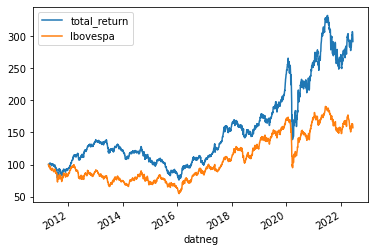

In [25]:
df_return[['total_return', 'Ibovespa']].plot()

In [75]:
df_return.query('"2019-11-01" < datneg < "2019-12-24"')

,next_cutoff,price_n,last_group_price,MagicFormula,BOVA11
datneg,,,,,
2019-11-04,2020-04-09,106,85.4,135,154
2019-11-05,2020-04-09,106,85.4,136,154
2019-11-06,2020-04-09,106,85.4,135,154
...,...,...,...,...,...
2019-12-19,2020-04-09,119,85.4,152,163
2019-12-20,2020-04-09,120,85.4,153,163
2019-12-23,2020-04-09,122,85.4,155,164
